In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Order_Status_DSAT.xlsx to Order_Status_DSAT.xlsx


In [ ]:
import pandas as pd
df_sampled_1 = pd.read_excel('Order_Status_DSAT.xlsx')

In [ ]:
df_sampled_1.shape

(4195, 7)

In [ ]:
# Remove the columns
df_sampled_1 = df_sampled_1.drop(columns=['fiscalmonth', 'data3rdinfo_guid', 'sat_vs_dissat','purpose_of_visit_hierarchy_level1', 'purpose_of_visit_hierarchy_level2', 'orderstatussurvey'], axis=1)
# Print out the first rows of papers
df_sampled_1.head()

,improvetext
0,"i need the information that is in ""track your ..."
1,i would like you to care more about after-sale...
2,on
3,To be able to communicate with someone who is ...
4,"can't find my order, not the first time"


In [ ]:
df_sampled_1.dtypes

improvetext    object
dtype: object

In [ ]:
df_sampled_1.shape

(4195, 1)

In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [ ]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_sampled_1.dropna(axis = 0, how ='any',inplace=True) 

df_sampled_1['improvetext'] = df_sampled_1['improvetext'].apply(clean_text)

df_sampled_1['Num_words_text'] = df_sampled_1['improvetext'].apply(lambda x:len(str(x).split())) 

mask =  (df_sampled_1['Num_words_text'] >3)

df_short_reviews = df_sampled_1[mask]

In [ ]:
type(df_short_reviews)

pandas.core.frame.DataFrame

In [ ]:
df_sampled = pd.DataFrame(df_short_reviews['improvetext'])

In [ ]:
new_stopwords = ["dell","able", "support", "time", "order"]

stpwrd = nltk.corpus.stopwords.words('english')

stpwrd.extend(new_stopwords)


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in new_stopwords])
    return rem_text

# remove stopwords from the text
df_sampled['improvetext']=df_sampled['improvetext'].apply(remove_stopwords)

In [ ]:
df_sampled['improvetext']

0       need information that track your correct with ...
1       would like care more about aftersales customer...
3       communicate with someone deal with overchargin...
4                                         cant find first
6       hard understand that takes days deliver piece ...
                              ...                        
4190    site asking confirm email that service request...
4191                    clear instructions confused folks
4192    today look more accurate ordering delivery inf...
4193     want search from quotation number display status
4194    cancelled because technical unable provide wor...
Name: improvetext, Length: 3754, dtype: object

In [ ]:
##import aqgFunction
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
pip install msgpack-python==0.5.4

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
##nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
df_sampled['improvetext'] = \
df_sampled['improvetext'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df_sampled['improvetext'] = \
df_sampled['improvetext'].map(lambda x: x.lower())
# Print out the first rows of papers
df_sampled['improvetext'].head()

In [ ]:
type(df_sampled)

pandas.core.frame.DataFrame

In [ ]:
text_list=df_sampled['improvetext'].tolist()
print(text_list[0])

need information that track your correct with delivery date


In [ ]:
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

['aftersale', 'customer', 'loyalty']


In [ ]:
##converting document into bag of words
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokenized_reviews], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[tokenized_reviews[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['information', 'correct', 'delivery', 'date']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in new_stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]\

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
  
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
##import pyLDAvis.gensim.models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','dell',"able", "support", "time", "order" ])

In [ ]:
tokenized_reviews

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(tokenized_reviews)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
tokenized_reviews

In [ ]:
data_words_bigrams

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(tokenized_reviews, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['information', 'correct', 'delivery', 'date']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

In [ ]:
id2word

In [ ]:
texts

In [ ]:
type(texts)

list

In [ ]:
len(texts)

3754

In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [ ]:
# View
#print(corpus[:1])

In [ ]:
id2word[0]

'correct'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('correct', 1), ('date', 1), ('delivery', 1), ('information', 1)],
 [('aftersale', 1), ('customer', 1), ('loyalty', 1)],
 [('address', 1),
  ('contact', 1),
  ('different', 1),
  ('email', 2),
  ('online', 1),
  ('price', 1),
  ('service', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
type(lda_model)

gensim.models.ldamodel.LdaModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.828339462715483

Coherence Score:  0.4474440520510499


In [ ]:
#print(list(nltk.bigrams(tokenized_reviews)))

In [ ]:


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.359850  0.091467       1        1  15.243867
5      0.065478 -0.424034       2        1  10.563456
9      0.226558  0.066984       3        1  10.487776
10     0.015890 -0.052242       4        1   8.211740
0     -0.052925  0.025956       5        1   5.832596
12    -0.051392  0.024450       6        1   5.799375
13    -0.056167  0.025365       7        1   5.692001
11    -0.054752  0.027520       8        1   5.572867
3     -0.053894  0.027362       9        1   5.447063
1     -0.060735  0.029054      10        1   5.063198
4     -0.066418  0.034180      11        1   5.059447
14    -0.062541  0.030347      12        1   4.749251
6     -0.066714  0.029479      13        1   4.726749
2     -0.071009  0.031787      14        1   3.956427
8     -0.071229  0.032324      15        1   3.594189, topic_info=              Term        Freq       Total Category  logprob  loglift
2         delivery  765.000000  765.000000  Default  30.0000  30.0000
3      information  810.000000  810.000000  Default  29.0000  29.0000
13         service  766.000000  766.000000  Default  28.0000  28.0000
5         customer  737.000000  737.000000  Default  27.0000  27.0000
49         product  531.000000  531.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
850   dissatisfied   10.532793   11.417854  Topic15  -4.6954   3.2452
311     individual    9.569637   10.454698  Topic15  -4.7913   3.2374
1998     transport    8.843793    9.728872  Topic15  -4.8702   3.2305
1094         close    8.804021    9.689084  Topic15  -4.8747   3.2301
204     commitment    8.476516    9.361580  Topic15  -4.9126   3.2265

[485 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
328       2  0.988493    ability
53        8  0.987688     access
306       6  0.992882    account
327       8  0.989504   accurate
1198      5  0.968033     active
...     ...       ...        ...
150      11  0.994814       work
983       9  0.867426  worthless
277      10  0.987747      wrong
297       5  0.984005       year
266      14  0.987171  yesterday

[455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 10, 11, 1, 13, 14, 12, 4, 2, 5, 15, 7, 3, 9])


"""Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart"""

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
##print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.828339460417959

Coherence Score:  0.6765621028244306


In [ ]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


Coherence is a key property of any well-organized text. It evaluates the degree of logical consistency for text and can help document a set of sentences into a logically consistent order, which is at the core of many text-synthesis tasks such as text generation and multi- document summarization.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=1, limit=50, step=3)

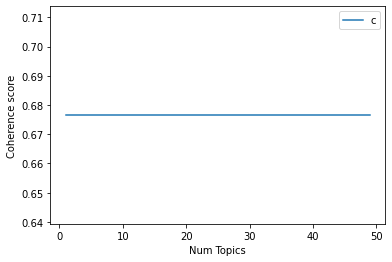

In [ ]:
# Show graph
limit=50; start=1; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

[(0,
  '0.046*"information" + 0.036*"product" + 0.035*"date" + 0.031*"day" + '
  '0.021*"item" + 0.021*"status" + 0.015*"carrier" + 0.013*"site" + '
  '0.012*"number" + 0.012*"tracking" + 0.011*"business" + 0.011*"update" + '
  '0.011*"laptop" + 0.010*"contact" + 0.010*"ship" + 0.010*"website" + '
  '0.010*"order" + 0.010*"purchase" + 0.010*"delivery" + 0.009*"return"'),
 (1,
  '0.034*"website" + 0.033*"number" + 0.024*"customer" + 0.020*"date" + '
  '0.018*"email" + 0.016*"ship" + 0.016*"easy" + 0.015*"people" + '
  '0.014*"phone" + 0.014*"system" + 0.014*"production" + 0.012*"site" + '
  '0.012*"delivery" + 0.011*"computer" + 0.011*"laptop" + 0.009*"service" + '
  '0.009*"today" + 0.008*"day" + 0.007*"call" + 0.007*"information"'),
 (2,
  '0.043*"number" + 0.033*"laptop" + 0.022*"delivery" + 0.016*"tracking" + '
  '0.016*"shipping" + 0.014*"email" + 0.013*"purchase" + 0.013*"process" + '
  '0.013*"problem" + 0.012*"customer" + 0.011*"information" + 0.010*"clear" + '
  '0.010*"date" +

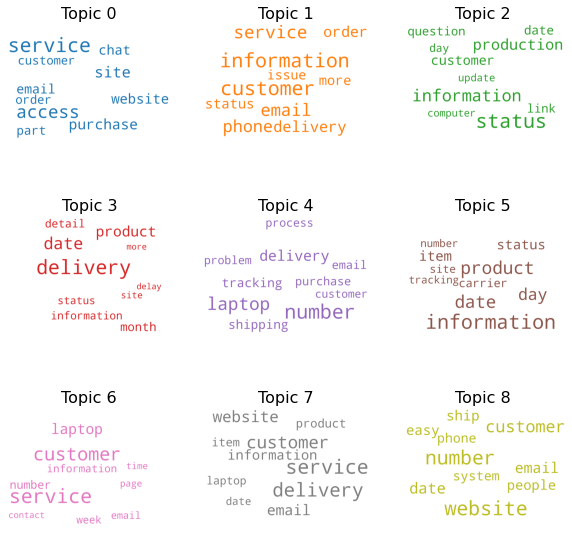

In [ ]:
##If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out.
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))


# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [ ]:
## Finding the dominant topic in each sentence
##One of the practical application of topic modeling is to determine what topic a given document is about.
##To find that, we find the topic number that has the highest percentage contribution in that document.

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df_sampled['improvetext'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(200)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.8125,"delivery, date, product, month, detail, inform...",need information that track your correct with ...
1,1,9.0,0.4117,"product, delivery, purchase, customer, date, s...",would like care more about aftersales customer...
2,2,8.0,0.3687,"information, account, number, payment, email, ...",NaN
3,3,0.0,0.0625,"information, product, date, day, item, status,...",communicate with someone deal with overchargin...
4,4,2.0,0.4836,"number, laptop, delivery, tracking, shipping, ...",cant find first
...,...,...,...,...,...
195,195,8.0,0.3400,"information, account, number, payment, email, ...",hello query status extremely confusing also ha...
196,196,1.0,0.3899,"website, number, customer, date, email, ship, ...",bought notebook days there update site status ...
197,197,2.0,0.2407,"number, laptop, delivery, tracking, shipping, ...",would like have cell phone that gives same fun...
198,198,8.0,0.7174,"information, account, number, payment, email, ...",that information about status delivery more ac...


In [ ]:
df_dominant_topic.to_csv('DOMINANT TOPIC_12.csv')

Building LDA Mallet Model
So far you have seen Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.

Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself. 

In [ ]:
!pip install --upgrade gensim==3.8

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8' ## often gives a better quality of topics.
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
##corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
##Just by changing the LDA algorithm, we increased the coherence score from .44 to .71. Not bad!


Coherence Score:  0.3600209166739959


In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# Show Topics
pprint(model.show_topics(formatted=False))

In [ ]:
model

In [ ]:
pprint(model.print_topics(num_words=15))

In [ ]:


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
vis

In [ ]:
df = pyLDAvis.gensim_models.prepare(model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
## find the optimal number of topics for LDA  ##My approach to finding the optimal number of topics is to build many LDA
## models with different values of number of topics (k) and pick the one that gives the highest coherence value.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=18, step=3)

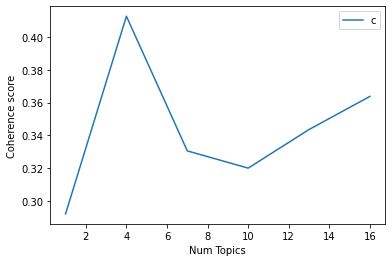

In [ ]:
# Show graph
limit=18; start=1; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.292
Num Topics = 4  has Coherence Value of 0.4127
Num Topics = 7  has Coherence Value of 0.3305
Num Topics = 10  has Coherence Value of 0.32
Num Topics = 13  has Coherence Value of 0.3435
Num Topics = 16  has Coherence Value of 0.3638


In [ ]:
pprint(model_list)

In [ ]:
##If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out.
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))


# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

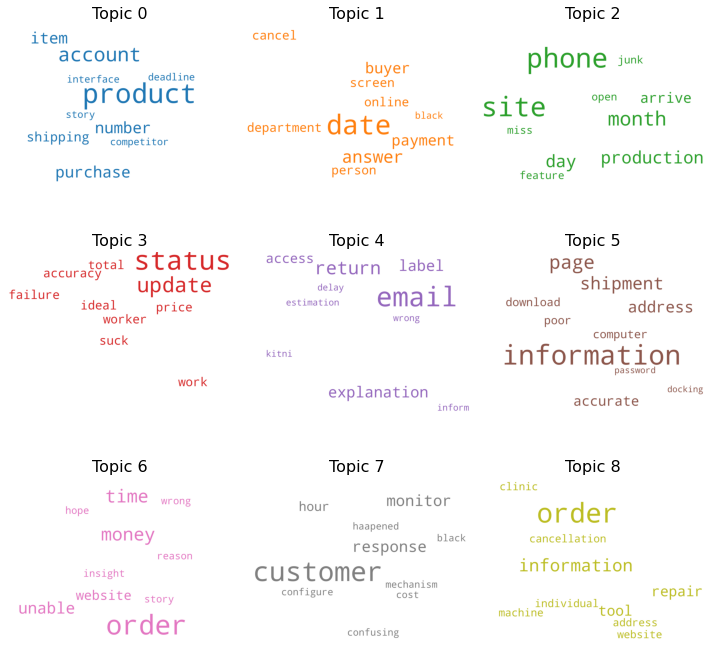

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
## Finding the dominant topic in each sentence
##One of the practical application of topic modeling is to determine what topic a given document is about.
##To find that, we find the topic number that has the highest percentage contribution in that document.

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df_sampled['improvetext'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(200)

In [ ]:
type(df_dominant_topic)

pandas.core.frame.DataFrame

In [ ]:
df_dominant_topic.to_csv('data12.csv')

In [ ]:
## Find the most representative document for each topic
"""Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, 
you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!"""

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1509,"support, call, page, case, response, favor, re...",ongoing support case absolutely mechanism cont...
1,1.0,0.0915,"order, return, invoice, explanation, productio...",order cancelled explanation would like explana...
2,2.0,0.1131,"information, address, answer, refund, access, ...",call phone provide answers music hours theres ...
3,3.0,0.1595,"email, item, label, message, aftersale, friend...",applied return process haven39t received email...
4,4.0,0.1375,"date, delivery, person, phone, business, morni...",ridiculous dell totally disappointed dell orde...


In [ ]:
type(sent_topics_sorteddf_mallet.columns)

pandas.core.indexes.base.Index

In [ ]:
sent_topics_sorteddf_mallet.columns.to_frame()

,0
Topic_Num,Topic_Num
Topic_Perc_Contrib,Topic_Perc_Contrib
Keywords,Keywords
Text,Text


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,10.0,"status, track, product, unable, list, shipper,...",5.0,0.0521
1.0,0.0,"support, call, page, case, response, favor, re...",4.0,0.0417
2.0,0.0,"support, call, page, case, response, favor, re...",4.0,0.0417
3.0,6.0,"order, buyer, good, month, taxis, keyboard, na...",4.0,0.0417
4.0,14.0,"service, hour, week, replacement, money, monit...",8.0,0.0833
...,...,...,...,...
91.0,14.0,"service, hour, week, replacement, money, monit...",NaN,NaN
92.0,11.0,"product, order, laptop, black, screen, softwar...",NaN,NaN
93.0,10.0,"status, track, product, unable, list, shipper,...",NaN,NaN
94.0,7.0,"customer, purchase, search, supply, invalid, a...",NaN,NaN
